

>> **<h1>Severstal: Steel Defect Detection</h1>**


Steel is one of the most important building materials of modern times. The physical properties of steel include high strength, low weight, durability, ductility and resistance to corrosion. Due to these properties of steel, buildings are resistant to natural and man-made wear which has made the material ubiquitous around the world.<br><br>

Severstal is among the top 50 producers of steel in the world and produced 12.04 and 11.8 Million tonnes of steel in 2018 and 2019 respectively. It is one among Russia’s biggest players in efficient steel mining and production. The company recently created a hybrid Data Lake as part of its digital strategy to secure the Company’s competitive advantages in the long-term. The infrastructure is designed to store Company functional data files for subsequent processing and use in Severstal’s data analysis, machine learning and artificial intelligence projects. Severstal is now looking to machine learning to improve automation, increase efficiency, and maintain high quality in their production. 



# 1. Business Problem
One of the key products of Severstal is steel sheets. The production process of flat sheet steel is delicate. From heating and rolling, to drying and cutting, several machines touch flat steel by the time it’s ready to ship. To ensure quality in the production of steel sheets, today, Severstal uses images from high frequency cameras to power a defect detection algorithm.

Through this competition, Severstal expects the AI community to improve the algorithm by **localizing and classifying surface defects on a steel sheet**.

## 1.1. Business objectives and constraints
1. A defective sheet most be predicted as defective, since there would be serious concerns about quality if we misclassify a defective sheet as non-defective. i.e. high recall value for each of the classes is needed.
2. No strict latency concerns.

## 1.2. Sources / References
Kaggle competition page : https://www.kaggle.com/c/severstal-steel-defect-detection/overview


References : 
- https://arxiv.org/pdf/1505.04597.pdf
- https://www.kaggle.com/cdeotte/keras-unet-with-eda
- https://en.wikipedia.org/wiki/S%C3%B8rensen%E2%80%93Dice_coefficient
- https://stanford.edu/~shervine/blog/keras-how-to-generate-data-on-the-fly

# 2. Machine Learning Problem

## 2.1. Mapping the business problem to an ML problem
Our task is to 
1. Detect/localize the defects in a steel sheet using image segmentation and
2. Classify the detected defects into one or more classes from [1, 2, 3, 4]

Therefore, it is a combination of image segmentation and multiclass classification.

## 2.2. Performance metric
Evaluation metric used is the mean Dice coefficient. The Dice coefficient can be used to compare the pixel-wise agreement between a predicted segmentation and its corresponding ground truth. The formula is given by:

\begin{align*}
\frac{2 * |X \cap Y|}{|X| + |Y|}
\end{align*}<br>
where X is the predicted set of pixels and Y is the ground truth.

<a href='https://en.wikipedia.org/wiki/S%C3%B8rensen%E2%80%93Dice_coefficient'>Read more about Dice Coefficient</a>


## 2.3. Data Overview

We have been given a zip folder of size 2GB which contains the following:

- train_images/ - folder contailning 12,568 training images (.jpg files)
- test_images/ - folder containing 5506 test images (.jpg files). We need to detect and localize defect in these images.
- train.csv - training annotations which provide segments for defects belonging to ClassId = [1, 2, 3, 4]
- sample_submission.csv - a sample submission file in the correct format, with each ImageId repeated 4 times, one for each of the 4 defect classes

Refer to section 3: EDA for more details about data.

In [1]:
% cd /content/sample_data/SSD

/content/sample_data/SSD


### Downloading and extracting data

In [2]:
!wget --referer = 'https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/14241/862020/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1607663416&Signature=pTv1BPELLERpK4FdySc1GbTfUrYJoLXSrYnK9VLGlYFRMb0r4bHT3o%2F%2FyvB25%2FeVRWqtEfxJuz7QsjAafWJuHYvAmoPRk5Miy0HdRTJT78UxUFePt05OVxc%2BwgO69ArTvO7IlvStv3C6mujtLSEeejPvhtl9s7ZGq2F2MjY0%2F273sEAcxqv6rjFrTjaPOj6%2FEXPif8UQdQX78IAe3tDMg4M3bT6I5OwjCDAAb2vKeA3Yyhz8vDfEjt31gUsdkfW%2FLAQ%2FG2fZ00vGm7zrbIPWAFkIH%2FvK%2BdYA5g6y0zPlJHvFqvabHWWr9bEDc2Yg1WERJ3ViODNOXLkQzndw%2Fzn0zA%3D%3D&response-content-disposition=attachment%3B+filename%3Dseverstal-steel-defect-detection.zip' -O "severstal-steel-defect-detection.zip"

--2020-12-09 12:59:37--  https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/14241/862020/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1607663416&Signature=pTv1BPELLERpK4FdySc1GbTfUrYJoLXSrYnK9VLGlYFRMb0r4bHT3o%2F%2FyvB25%2FeVRWqtEfxJuz7QsjAafWJuHYvAmoPRk5Miy0HdRTJT78UxUFePt05OVxc%2BwgO69ArTvO7IlvStv3C6mujtLSEeejPvhtl9s7ZGq2F2MjY0%2F273sEAcxqv6rjFrTjaPOj6%2FEXPif8UQdQX78IAe3tDMg4M3bT6I5OwjCDAAb2vKeA3Yyhz8vDfEjt31gUsdkfW%2FLAQ%2FG2fZ00vGm7zrbIPWAFkIH%2FvK%2BdYA5g6y0zPlJHvFqvabHWWr9bEDc2Yg1WERJ3ViODNOXLkQzndw%2Fzn0zA%3D%3D&response-content-disposition=attachment%3B+filename%3Dseverstal-steel-defect-detection.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.13.80, 172.217.13.240, 172.217.7.144, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.13.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1684204253 (1.6G) [application/zip]
Saving to: ‘severstal-steel

In [3]:
from zipfile import ZipFile
file_name="severstal-steel-defect-detection.zip"

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Importing libraries

In [5]:
## Importing required packages
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime
import os
import gc
import pickle

from tqdm import tqdm_notebook as tqdm

import pandas as pd
import numpy as np
import math
from numpy import asarray
import cv2
from os import listdir
import random

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from PIL import Image

from sklearn import metrics

from collections import Counter
from collections import defaultdict
from sklearn.model_selection import train_test_split

%tensorflow_version 1.x  # Use Tensorflow version 1.x
import tensorflow as tf
from keras import backend as K
from keras import Model
from keras.layers import UpSampling2D, Conv2D, Activation, LeakyReLU, BatchNormalization,Input,Conv2DTranspose,Dropout
from keras.layers.pooling import MaxPooling2D, GlobalMaxPool2D
from keras.layers.merge import concatenate,add

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, LearningRateScheduler,Callback

from keras.optimizers import Adam
from keras.losses import binary_crossentropy

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.x  # Use Tensorflow version 1.x`. This will be interpreted as: `1.x`.


TensorFlow 1.x selected.


Using TensorFlow backend.


# 3. Exploratory Data Analysis

## 3.1. Loading train.csv file

In [6]:
# loading the train.csv file containing pixels indicating defects  
train_df= pd.read_csv("train.csv")
train_df.head()

,ImageId,ClassId,EncodedPixels
0,0002cc93b.jpg,1,29102 12 29346 24 29602 24 29858 24 30114 24 3...
1,0007a71bf.jpg,3,18661 28 18863 82 19091 110 19347 110 19603 11...
2,000a4bcdd.jpg,1,37607 3 37858 8 38108 14 38359 20 38610 25 388...
3,000f6bf48.jpg,4,131973 1 132228 4 132483 6 132738 8 132993 11 ...
4,0014fce06.jpg,3,229501 11 229741 33 229981 55 230221 77 230468...


- **ImageID**: image file name
- **ClassID**: type/class of the defect [1, 2, 3, 4]
- **EncodedPixels**: represent the range of defective pixels in an image in the form of run-length encoded pixels(pixel number where defect starts <'space'> pixel length of defect).  E.g. '**29102 12**' implies the defect is starting at pixel 29102 and running a total of 12 pixels, i.e. pixels 29102, 29103,........., 29113 are defective.
The pixels are numbered from top to bottom, then left to right: 1 is pixel (1,1), 2 is pixel (2,1), etc.

The competition requires the submission file to contain predicted *ClassID* and *EncodedPixels* for each test_image, in the same format as given in train.csv. 



In [7]:
train_df.ImageId.describe()

count              7095
unique             6666
top       db4867ee8.jpg
freq                  3
Name: ImageId, dtype: object

- There are 7095 datapoints corresponding to 6666 steel sheet images containing defects

**Check for null values**

In [8]:
train_df[train_df.isnull().any(axis=1)]

,ImageId,ClassId,EncodedPixels


There are no null values in train.csv

## 3.2. Analysing train & test images folders

### 3.2.1. Number of train & test images

In [9]:
train_count= 0 
test_count= 0  

for filename in os.listdir('train_images'):
    train_count+=1 
for filename in os.listdir('test_images'):
    test_count+=1

print("Number of train images : ",train_count)
print("Number of test images : ",test_count)

Number of train images :  12568
Number of test images :  5506


There are more images in train_images folder than unique image Ids in train.csv. This means, not all the images in train_folder have at least one of the defects 1, 2, 3, 4.

Number of non-defective images in the train_images folder: 5902


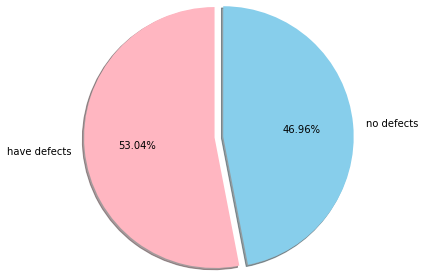

In [10]:
print("Number of non-defective images in the train_images folder:", train_count-train_df.ImageId.nunique())

#Pie-chart https://pythonspot.com/matplotlib-pie-chart/
# Data to plot
labels = 'have defects', 'no defects'
sizes = [train_df.ImageId.nunique(), train_count-train_df.ImageId.nunique()]
explode = (0.1, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=['lightpink', 'skyblue'], autopct='%1.2f%%', shadow=True, startangle=90, radius=1.5)

# plt.axis('equal')
plt.show()

Let's see some images that we are categorizing as non-defective.

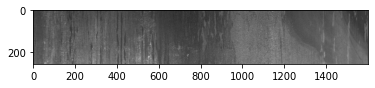

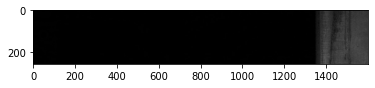

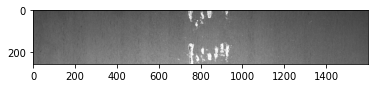

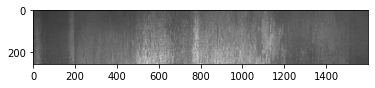

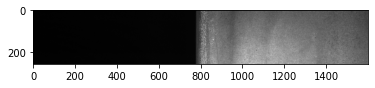

In [11]:
random.seed(42)

defective = set(train_df.ImageId.values)
non_defective = set(listdir('train_images')) - defective
for filename in random.sample(non_defective, 5):
    # load image
    img = cv2.imread('train_images/' + filename)
    plt.imshow(img)
    plt.grid(False)
    plt.show()

Pictures suggest that there are defects in some of these images too. May be these defects do not belong to one of the four categories [1,2,3,4] *(let's assume this for simplicity)*

### 3.2.2. Check if all images in train and test are of the same size

**Train images**

In [12]:
image_size = [] #list of tuples containing shape(height, width, channel) of images
for image_id in tqdm(listdir('train_images')):
    img = cv2.imread("train_images/"+image_id)
    h, w, c = img.shape

    image_size.append((h, w, c))

In [13]:
# print unique values in image_size list
set(image_size)

{(256, 1600, 3)}

All train images have same size: 256 x 1600 x 3

**Test images**

In [14]:
test_image_size = [] #list of tuples containing shape(height, width, channel) of images
for image_id in tqdm(listdir('test_images')):
    img = cv2.imread("test_images/"+image_id)
    h, w, c = img.shape

    test_image_size.append((h, w, c))

In [15]:
# print unique values in test_image_size list
set(test_image_size)

{(256, 1600, 3)}

**All images in train and test folders have the same size (256 x 1600 x 3)**

## 3.3. Analysis of labels: ClassId

### 3.3.1. Checking for class count

In [16]:
counts = train_df.ClassId.value_counts()
print(counts)

3    5150
1     897
4     801
2     247
Name: ClassId, dtype: int64


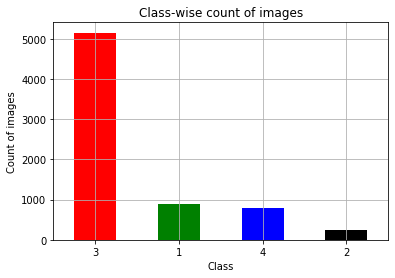

Number of images in class 3 : 5150 ( 77.258 %)
Number of images in class 1 : 897 ( 13.456 %)
Number of images in class 4 : 801 ( 12.016 %)
Number of images in class 2 : 247 ( 3.705 %)


In [17]:
my_colors = list('rgbkymc')
counts.plot(kind='bar', color=my_colors, rot=0)
plt.xlabel('Class')
plt.ylabel('Count of images')
plt.title('Class-wise count of images')
plt.grid()
plt.show()

for i in counts.index.values:
    print('Number of images in class', i,':',counts[i],'(',np.round((counts[i]/train_df.ImageId.nunique()*100), 3), '%)')

- The dataset looks imbalanced.
- Number of images with class 3 defect is very high compared to that of other classes. 77% of the defective images have class 3 defect.
- Class 2 is the least occurring class, only 3.7 % images in train.csv belong to class 2.

**The Sum of percentage values in the above analysis is more than 100, which means some images have defects belonging to more than one class.**

### 3.3.2. Checking number of labels tagged per image

In [18]:
labels_per_image = train_df.groupby('ImageId')['ClassId'].count().value_counts()
print(labels_per_image)

1    6239
2     425
3       2
Name: ClassId, dtype: int64


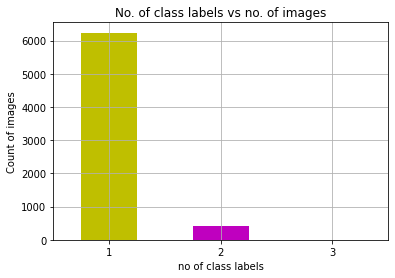

Number of images having 1 class label(s): 6239 (93.594%)
Number of images having 2 class label(s): 425 (6.376%)
Number of images having 3 class label(s): 2 (0.03%)


In [19]:
my_colors = list('ymcrgbk')
labels_per_image.plot(kind='bar', color=my_colors, rot=0)
plt.xlabel('no of class labels')
plt.ylabel('Count of images')
plt.title('No. of class labels vs no. of images')
plt.grid()
plt.show()

sorted_i = np.argsort(-labels_per_image.values)
for i in sorted_i:
    print(f'Number of images having {i+1} class label(s): {labels_per_image.values[i]} ({np.round((labels_per_image.values[i]/train_df.ImageId.nunique()*100), 3)}%)')

**Observations:**
- Majority of the images (93.6%) have only one class of defects.

- Only 2 images (0.03%) have a combination of 3 classes of defects.
- Rest of the images (6.37%) have a combination of 2 classes of defects.
- No images have all 4 classes of defects.

### 3.3.3. Let's take look at the images having defects of each of the 4 classes

In [20]:
d1= set(train_df[train_df.ClassId==1].ImageId.values)
d2= set(train_df[train_df.ClassId==2].ImageId.values)
d3= set(train_df[train_df.ClassId==3].ImageId.values)
d4= set(train_df[train_df.ClassId==4].ImageId.values)

**Class 1**

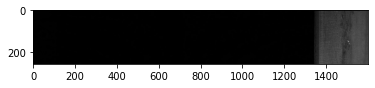

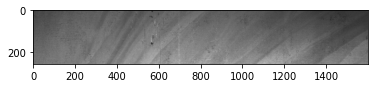

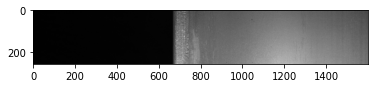

In [21]:
random.seed(42)
for filename in random.sample(d1, 3):
    # load image
    img = cv2.imread('train_images/' + filename)
    plt.imshow(img)
    plt.grid(False)
    plt.show()

**Class 2**

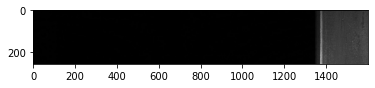

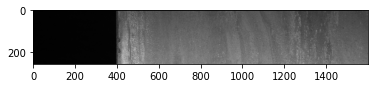

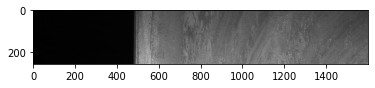

In [22]:
random.seed(42)
for filename in random.sample(d2, 3):
    # load image
    img = cv2.imread('train_images/' + filename)
    plt.imshow(img)
    plt.grid(False)
    plt.show()

**Class 3**

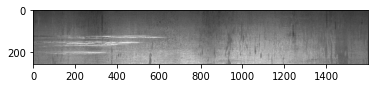

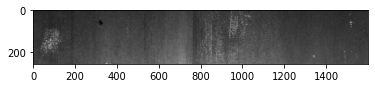

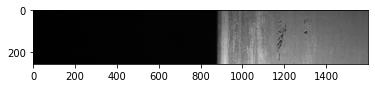

In [23]:
random.seed(121)
for filename in random.sample(d3, 3):
    # load image
    img = cv2.imread('train_images/' + filename)
    plt.imshow(img)
    plt.grid(False)
    plt.show()

**Class 4**

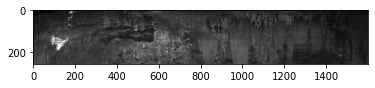

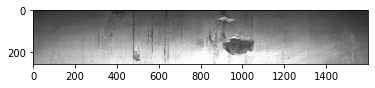

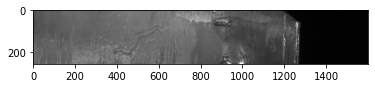

In [24]:
random.seed(42)
for filename in random.sample(d4, 3):
    # load image
    img = cv2.imread('train_images/' + filename)
    plt.imshow(img)
    plt.grid(False)
    plt.show()

**Images belonging to 2 classes**

In [25]:
labels_per_image = train_df.groupby('ImageId')['ClassId'].count().reset_index(name='count')

In [26]:
d5 = set(labels_per_image[labels_per_image['count']==2].ImageId.values)

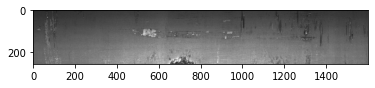

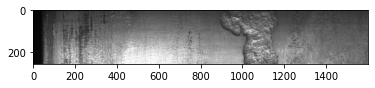

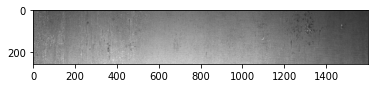

In [27]:
random.seed(42)
for filename in random.sample(d5, 3):
    # load image
    img = cv2.imread('train_images/' + filename)
    plt.imshow(img)
    plt.grid(False)
    plt.show()

**Images belonging to 3 classes**

In [28]:
d6 = labels_per_image[labels_per_image['count']==3]
d6

,ImageId,count
5740,db4867ee8.jpg,3
6253,ef24da2ba.jpg,3


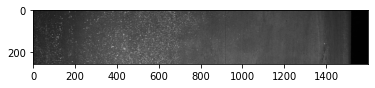

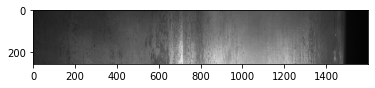

In [29]:
for filename in set(d6.ImageId.values):
    # load image
    img = cv2.imread('train_images/' + filename)
    plt.imshow(img)
    plt.grid(False)
    plt.show()

# 4. Data preparation

In [ ]:
images= []
class_id= []
for img in listdir('train_images'):
    images.append(img)
    class_id.append(1)
    images.append(img)
    class_id.append(2)
    images.append(img)
    class_id.append(3)
    images.append(img)
    class_id.append(4)
train_images= pd.DataFrame(images,columns=['ImageId'])
train_images['ClassId'] = class_id
print('train_images shape:', train_images.shape)
train_images.head()

train_images shape: (50272, 2)


,ImageId,ClassId
0,ba4008245.jpg,1
1,ba4008245.jpg,2
2,ba4008245.jpg,3
3,ba4008245.jpg,4
4,7b0b85b1d.jpg,1


In [ ]:
train_df.head(3)

,ImageId,ClassId,EncodedPixels
0,0002cc93b.jpg,1,29102 12 29346 24 29602 24 29858 24 30114 24 3...
1,0007a71bf.jpg,3,18661 28 18863 82 19091 110 19347 110 19603 11...
2,000a4bcdd.jpg,1,37607 3 37858 8 38108 14 38359 20 38610 25 388...


In [ ]:
# Create a dataframe that conatains all the images(defective and non_defective)
all_df = pd.merge(train_images, train_df, how='outer',on=['ImageId','ClassId'])
all_df = all_df.fillna('')
print(all_df.shape)
all_df[50:55]

(50272, 3)


,ImageId,ClassId,EncodedPixels
50,13b66e5de.jpg,3,
51,13b66e5de.jpg,4,187146 6 187402 12 187658 13 187914 14 188170 ...
52,972837f87.jpg,1,
53,972837f87.jpg,2,
54,972837f87.jpg,3,


In [ ]:
#https://www.geeksforgeeks.org/python-pandas-pivot_table/
all_df = pd.pivot_table(all_df, values='EncodedPixels', index='ImageId',columns='ClassId', aggfunc=np.sum).astype(str)
all_df = all_df.reset_index()
all_df.columns = ['ImageId','Defect_1','Defect_2','Defect_3','Defect_4']
all_df.head()

,ImageId,Defect_1,Defect_2,Defect_3,Defect_4
0,0002cc93b.jpg,29102 12 29346 24 29602 24 29858 24 30114 24 3...,,,
1,00031f466.jpg,,,,
2,000418bfc.jpg,,,,
3,000789191.jpg,,,,
4,0007a71bf.jpg,,,18661 28 18863 82 19091 110 19347 110 19603 11...,


In [ ]:
all_df.to_csv("prep_data.csv", index=False)

In [ ]:
data = pd.read_csv("prep_data.csv")
data.head()

,ImageId,Defect_1,Defect_2,Defect_3,Defect_4
0,0002cc93b.jpg,29102 12 29346 24 29602 24 29858 24 30114 24 3...,NaN,NaN,NaN
1,00031f466.jpg,NaN,NaN,NaN,NaN
2,000418bfc.jpg,NaN,NaN,NaN,NaN
3,000789191.jpg,NaN,NaN,NaN,NaN
4,0007a71bf.jpg,NaN,NaN,18661 28 18863 82 19091 110 19347 110 19603 11...,NaN


In [ ]:
# Replace NAs with blank spaces
data.fillna('', inplace=True)
data.head()

,ImageId,Defect_1,Defect_2,Defect_3,Defect_4
0,0002cc93b.jpg,29102 12 29346 24 29602 24 29858 24 30114 24 3...,,,
1,00031f466.jpg,,,,
2,000418bfc.jpg,,,,
3,000789191.jpg,,,,
4,0007a71bf.jpg,,,18661 28 18863 82 19091 110 19347 110 19603 11...,


## 4.2 Train, CV split 85:15

In [ ]:
#splitting the data into train & cv
from sklearn.model_selection import train_test_split
train_data, cv_data = train_test_split(data, test_size=0.15, random_state=42)
print(train_data.shape)
print(cv_data.shape)

(10682, 5)
(1886, 5)


## 4.3. Generating data for Keras model

**Train generator**

In [ ]:
# https://stanford.edu/~shervine/blog/keras-how-to-generate-data-on-the-fly
import keras
from keras.preprocessing.image import ImageDataGenerator
class Train_DataGenerator(keras.utils.Sequence):
    def __init__(self, df, batch_size = 32,shuffle=False, 
                 preprocess=None, info={}):
        super().__init__()
        self.df = df
        self.shuffle = shuffle
        self.batch_size = batch_size
        self.preprocess = preprocess
        self.info = info
        self.data_path = 'train_images/'
        self.on_epoch_end()
        
    def __len__(self):
        return int(np.floor(len(self.df) / self.batch_size))
    
    def on_epoch_end(self):
        self.indexes = np.arange(len(self.df))
        if self.shuffle == True:
            np.random.shuffle(self.indexes)
    #fliping the images horizontally and normalization of samples
    def __getitem__(self, index):
        train_datagen = ImageDataGenerator()
        param = {'flip_horizontal':True, 'samplewise_std_normalization' : True}
        
        X = np.empty((self.batch_size,128,800,3),dtype=np.float32) #images
        y = np.empty((self.batch_size,128,800,4),dtype=np.int8)    #masks
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]
        for i,f in enumerate(self.df['ImageId'].iloc[indexes]):
            self.info[index*self.batch_size+i]=f
            img = Image.open(self.data_path + f).resize((800,128))
            X[i,] = train_datagen.apply_transform(x = img, transform_parameters = param)
                #run-length encoding on the pixel values
            for j in range(4):
                mask = rle2mask(self.df['Defect_'+str(j+1)].iloc[indexes[i]])
                y[i,:,:,j] = train_datagen.apply_transform(x = mask, transform_parameters = param)
        if self.preprocess!=None: X = self.preprocess(X)
        return X, y

**Validation generator**

In [ ]:
# https://stanford.edu/~shervine/blog/keras-how-to-generate-data-on-the-fly
import keras
from keras.preprocessing.image import ImageDataGenerator
class Val_DataGenerator(keras.utils.Sequence):
    def __init__(self, df, batch_size = 32,shuffle=False, 
                 preprocess=None, info={}):
        super().__init__()
        self.df = df
        self.shuffle = shuffle
        self.batch_size = batch_size
        self.preprocess = preprocess
        self.info = info
        self.data_path = 'train_images/'
        self.on_epoch_end()
        
    def __len__(self):
        return int(np.floor(len(self.df) / self.batch_size))
    
    def on_epoch_end(self):
        self.indexes = np.arange(len(self.df))
        if self.shuffle == True:
            np.random.shuffle(self.indexes)
    #fliping the images horizontally and normalization of samples
    def __getitem__(self, index):
        train_datagen = ImageDataGenerator()
        param = {'flip_horizontal':False, 'samplewise_std_normalization' : True}
        
        X = np.empty((self.batch_size,128,800,3),dtype=np.float32) #images
        y = np.empty((self.batch_size,128,800,4),dtype=np.int8)    #masks
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]
        for i,f in enumerate(self.df['ImageId'].iloc[indexes]):
            self.info[index*self.batch_size+i]=f
            img = Image.open(self.data_path + f).resize((800,128))
            X[i,] = train_datagen.apply_transform(x = img, transform_parameters = param)
                #run-length encoding on the pixel values
            for j in range(4):
                mask = rle2mask(self.df['Defect_'+str(j+1)].iloc[indexes[i]])
                y[i,:,:,j] = train_datagen.apply_transform(x = mask, transform_parameters = param)
        if self.preprocess!=None: X = self.preprocess(X)
        return X, y

## 4.4. Functions for converting RLE encoded pixels to masks and vice-versa

In [ ]:
# https://www.kaggle.com/titericz/building-and-visualizing-masks

def rle2mask(rle):
    # CONVERT RLE TO MASK 
    if (pd.isnull(rle))|(rle==''): 
        return np.zeros((128,800) ,dtype=np.uint8)
    
    height= 256
    width = 1600
    mask= np.zeros( width*height ,dtype=np.uint8)

    array = np.asarray([int(x) for x in rle.split()])
    starts = array[0::2]-1
    lengths = array[1::2]    
    for index, start in enumerate(starts):
        mask[int(start):int(start+lengths[index])] = 1
    
    return mask.reshape( (height,width), order='F' )[::2,::2]


# to convert masks to run length encoded values
def mask2rle(img):
    '''
    img: numpy array containing ones and zeros as pixel values, 1 - mask, 0 - background
    Returns String run length ecoded pixels 
    '''
    pixels= img.T.flatten() # Convert nd-array to 1d-array (numbering of pixels is from top to bottom)
    pixels = np.concatenate([[0], pixels, [0]]) # Adding zeros at the start and end so that if there's mask at the first/last pixel, it gets detected.
    runs = np.where(pixels[1:] != pixels[:-1])[0] + 1 # Detect all changing pixels (where pixel values changes, either 0 -> 1 or 1 -> 0)
    
    # To get RLE, we need start pixels and run lengths
    # Start pixels are the pixels where change 0 -> 1 occurs, i.e. pixels at even indices
    # Run length is the pixel distance between two consecutive changing pixels. So, run lengths = odd indices - even indices
    runs[1::2] -= runs[::2] 

    return ' '.join(str(x) for x in runs)

#### Check if the above functions are working fine

Sample images with Class 1 defect:


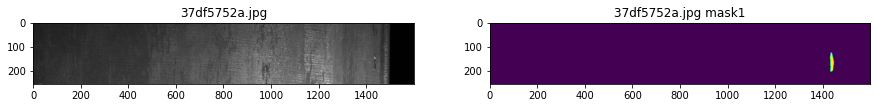

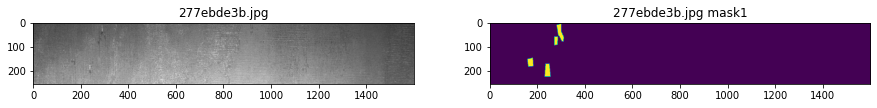

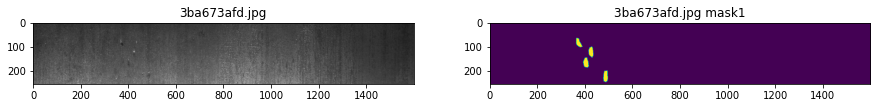


Sample images with Class 2 defect:


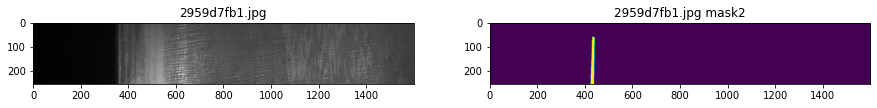

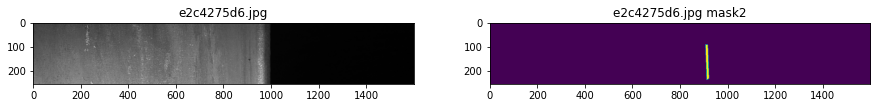

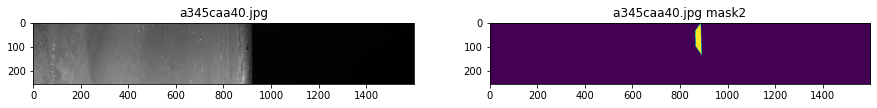


Sample images with Class 3 defect:


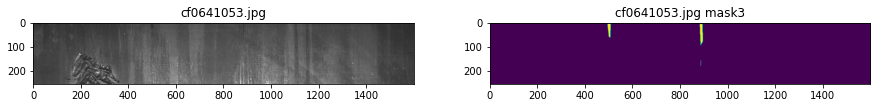

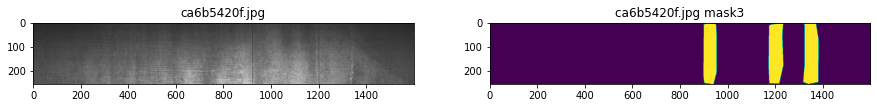

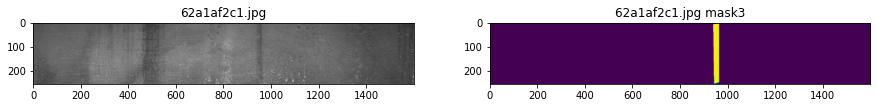


Sample images with Class 4 defect:


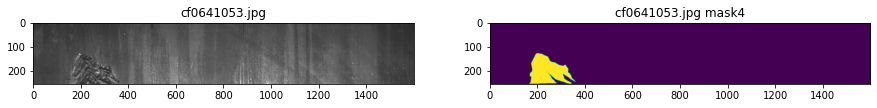

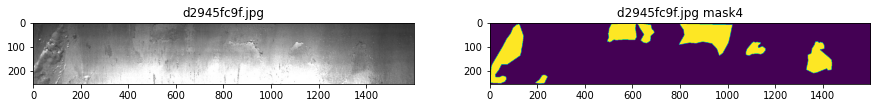

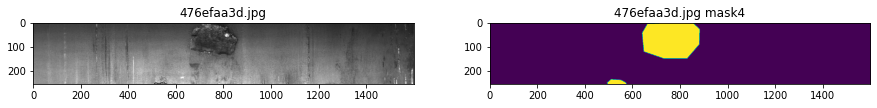

In [ ]:
# Visualizing some images and their masks

for k in [1,2,3,4]:
    cnt=0
    print("Sample images with Class {} defect:".format(k))
    for i in train_data[train_data[f'Defect_{k}']!=''][['ImageId',f'Defect_{k}']].values:
        if cnt<3:
            fig, (ax1,ax2) = plt.subplots(nrows = 1,ncols = 2,figsize=(15, 7))
            img = cv2.imread('train_images/' + str(i[0]))
            ax1.imshow(img)
            ax1.set_title(i[0])
            cnt+=1
            ax2.imshow(rle2mask(i[1]))
            ax2.set_title(i[0]+' mask'+str(k))
            plt.show()
    print('='*100,'\n')

In [ ]:
mask2rle(rle2mask(i[1]))

'67466 2 67720 4 67975 7 68231 9 68486 11 68742 12 68997 13 69253 14 69509 14 69764 16 70020 19 70147 3 70275 21 70403 9 70531 24 70659 15 70786 32 70914 21 71042 32 71170 27 71297 34 71426 30 71553 34 71682 32 71808 36 71938 34 72064 36 72194 36 72320 37 72450 38 72577 36 72706 39 72833 37 72962 39 73090 36 73218 40 73347 7 73359 22 73474 40 73615 22 73730 40 73871 21 73986 40 74127 22 74242 40 74383 24 74498 40 74639 25 74754 40 74895 26 75010 40 75151 28 75266 30 75297 9 75407 31 75522 29 75555 7 75663 33 75778 29 75813 5 75919 37 76034 28 76175 38 76290 28 76431 39 76546 28 76687 40 76802 29 76943 41 77058 30 77199 42 77314 30 77454 44 77570 31 77710 45 77826 32 77966 46 78082 32 78221 48 78338 33 78477 49 78594 33 78728 57 78850 34 78982 64 79106 34 79237 68 79362 33 79493 69 79618 33 79748 71 79874 33 80003 73 80130 33 80258 75 80386 32 80514 76 80642 32 80769 78 80898 30 81024 80 81154 28 81280 81 81410 27 81535 83 81666 26 81790 85 81922 24 82046 87 82178 23 82301 93 82434 22 8

In [ ]:
i[1]

'67466 2 67720 4 67975 7 68231 9 68486 11 68742 12 68997 13 69253 14 69509 14 69764 16 70020 19 70147 3 70275 21 70403 9 70531 24 70659 15 70786 32 70914 21 71042 32 71170 27 71297 34 71426 30 71553 34 71682 32 71808 36 71938 34 72064 36 72194 36 72320 37 72450 38 72577 36 72706 39 72833 37 72962 39 73090 36 73218 40 73347 7 73359 22 73474 40 73615 22 73730 40 73871 21 73986 40 74127 22 74242 40 74383 24 74498 40 74639 25 74754 40 74895 26 75010 40 75151 28 75266 30 75297 9 75407 31 75522 29 75555 7 75663 33 75778 29 75813 5 75919 37 76034 28 76175 38 76290 28 76431 39 76546 28 76687 40 76802 29 76943 41 77058 30 77199 42 77314 30 77454 44 77570 31 77710 45 77826 32 77966 46 78082 32 78221 48 78338 33 78477 49 78594 33 78728 57 78850 34 78982 64 79106 34 79237 68 79362 33 79493 69 79618 33 79748 71 79874 33 80003 73 80130 33 80258 75 80386 32 80514 76 80642 32 80769 78 80898 30 81024 80 81154 28 81280 81 81410 27 81535 83 81666 26 81790 85 81922 24 82046 87 82178 23 82301 93 82434 22 8

**As can be seen above, the original values of EncodedPixels match exactly with RLE pixels encoded using mask2rle() function over the mask created using rle2mask(). Therefore, the two functions are working as desired.**

- **Note: The above illustration is done using masks of size 256 x 1600 whereas the code in rle2mask() has now been changed so as to get masks of size 128 x 800, as we will use images of halved size for training.**

## 4.5. Defining metric and loss function

In [ ]:
from keras import backend as K
from keras.losses import binary_crossentropy

def dice_coef(y_true, y_pred, smooth=1):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)
  
def bce_dice_loss(y_true, y_predict):
    return binary_crossentropy(y_true, y_predict) + (1-dice_coef(y_true, y_predict))

def  dice_loss(y_true, y_predict):
    return (1-dice_coef(y_true, y_predict))

# 5. Model

## 5.1. U-net architecture

In [ ]:
def conv2d_block(input_tensor, n_filters, kernel_size = 3, batchnorm = True):
    '''returns a block of two 3x3 convolutions, each  followed by a rectified linear unit (ReLU)'''
    # first layer
    x = Conv2D(filters = n_filters, kernel_size = (kernel_size, kernel_size),\
              kernel_initializer = 'he_normal', padding = 'same')(input_tensor)
    if batchnorm:
        x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    # second layer
    x = Conv2D(filters = n_filters, kernel_size = (kernel_size, kernel_size),\
              kernel_initializer = 'he_normal', padding = 'same')(x)
    if batchnorm:
        x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    return x

In [ ]:
def get_unet(input_img, n_filters, dropout, batchnorm):
    """Function to define the UNET Model"""
    # Contracting Path
    c1 = conv2d_block(input_img, n_filters * 1, kernel_size = 3, batchnorm = batchnorm)
    p1 = MaxPooling2D((2, 2))(c1)
    p1 = Dropout(dropout)(p1)
    
    c2 = conv2d_block(p1, n_filters * 2, kernel_size = 3, batchnorm = batchnorm)
    p2 = MaxPooling2D((2, 2))(c2)
    p2 = Dropout(dropout)(p2)
    
    c3 = conv2d_block(p2, n_filters * 4, kernel_size = 3, batchnorm = batchnorm)
    p3 = MaxPooling2D((2, 2))(c3)
    p3 = Dropout(dropout)(p3)
    
    c4 = conv2d_block(p3, n_filters * 8, kernel_size = 3, batchnorm = batchnorm)
    p4 = MaxPooling2D((2, 2))(c4)
    p4 = Dropout(dropout)(p4)
    
    c5 = conv2d_block(p4, n_filters = n_filters * 16, kernel_size = 3, batchnorm = batchnorm)
    
    # Expansive Path
    u6 = UpSampling2D()(c5)
    u6 = Conv2D(filters = n_filters *8, kernel_size = (2, 2), kernel_initializer = 'he_normal', padding = 'same')(u6)
    u6 = concatenate([u6, c4])
    u6 = Dropout(dropout)(u6)
    c6 = conv2d_block(u6, n_filters * 8, kernel_size = 3, batchnorm = batchnorm)
    
    u7 = UpSampling2D()(c6)
    u7 = Conv2D(filters = n_filters *4, kernel_size = (2, 2), kernel_initializer = 'he_normal', padding = 'same')(u7)
    u7 = concatenate([u7, c3])
    u7 = Dropout(dropout)(u7)
    c7 = conv2d_block(u7, n_filters * 4, kernel_size = 3, batchnorm = batchnorm)
    
    u8 = UpSampling2D()(c7)
    u8 = Conv2D(filters = n_filters *2, kernel_size = (2, 2), kernel_initializer = 'he_normal', padding = 'same')(u8)
    u8 = concatenate([u8, c2])
    u8 = Dropout(dropout)(u8)
    c8 = conv2d_block(u8, n_filters * 2, kernel_size = 3, batchnorm = batchnorm)
    
    u9 = UpSampling2D()(c8)
    u9 = Conv2D(filters = n_filters *1, kernel_size = (2, 2), kernel_initializer = 'he_normal', padding = 'same')(u9)
    u9 = concatenate([u9, c1])
    u9 = Dropout(dropout)(u9)
    c9 = conv2d_block(u9, n_filters * 1, kernel_size = 3, batchnorm = batchnorm)
    
    outputs = Conv2D(4, (1, 1), activation='sigmoid')(c9)
    model = Model(inputs=[input_img], outputs=[outputs])
    return model

In [ ]:
input_img = Input((128, 800, 3), name='img')
model = get_unet(input_img, n_filters=8, dropout=0.2, batchnorm=True)
model.compile(optimizer=Adam(), loss=bce_dice_loss, metrics=[dice_coef])
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img (InputLayer)                (None, 128, 800, 3)  0                                            
__________________________________________________________________________________________________
conv2d_24 (Conv2D)              (None, 128, 800, 8)  224         img[0][0]                        
__________________________________________________________________________________________________
batch_normalization_19 (BatchNo (None, 128, 800, 8)  32          conv2d_24[0][0]                  
__________________________________________________________________________________________________
activation_19 (Activation)      (None, 128, 800, 8)  0           batch_normalization_19[0][0]     
____________________________________________________________________________________________

## 5.2. Checkpointing the model and creating callback list

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.python.keras.callbacks import TensorBoard
from keras.callbacks import TensorBoard
import tensorflow as tf
import keras
from tensorboardcolab import *

tbc=TensorBoardColab()

filepath="/content/drive/My Drive/Colab Notebooks/Steel Defect Detection/model2.h5"
checkpoints = ModelCheckpoint(filepath, monitor='val_dice_coef', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoints, TensorBoardColabCallback(tbc)]

Wait for 8 seconds...
TensorBoard link:
https://49200814.ngrok.io


## 5.3. Training

In [ ]:
train_batches = Train_DataGenerator(train_data,shuffle=True)
valid_batches = Val_DataGenerator(cv_data)
history = model.fit_generator(train_batches, validation_data = valid_batches, epochs = 50, verbose=1,
                              callbacks = callbacks_list)





Epoch 1/50
333/333 [==============================] - 271s 814ms/step - loss: 1.2618 - dice_coef: 0.0370 - val_loss: 1.0338 - val_dice_coef: 0.0957

Epoch 00001: val_dice_coef improved from -inf to 0.09568, saving model to /content/drive/My Drive/Colab Notebooks/Steel Defect Detection/model2.h5

Epoch 2/50
333/333 [==============================] - 258s 776ms/step - loss: 0.8803 - dice_coef: 0.1842 - val_loss: 0.8293 - val_dice_coef: 0.2641

Epoch 00002: val_dice_coef improved from 0.09568 to 0.26414, saving model to /content/drive/My Drive/Colab Notebooks/Steel Defect Detection/model2.h5
Epoch 3/50
333/333 [==============================] - 258s 775ms/step - loss: 0.6117 - dice_coef: 0.4257 - val_loss: 0.6062 - val_dice_coef: 0.4444

Epoch 00003: val_dice_coef improved from 0.26414 to 0.44442, saving model to /content/drive/My Drive/Colab Notebooks/Steel Defect Detection/model2.h5
Epoch 4/50
333/333 [==============================] - 260s 780ms/step - loss: 0.5556 - dice_coef: 0.4

## 5.4. Tensorboard plots of training & validation results

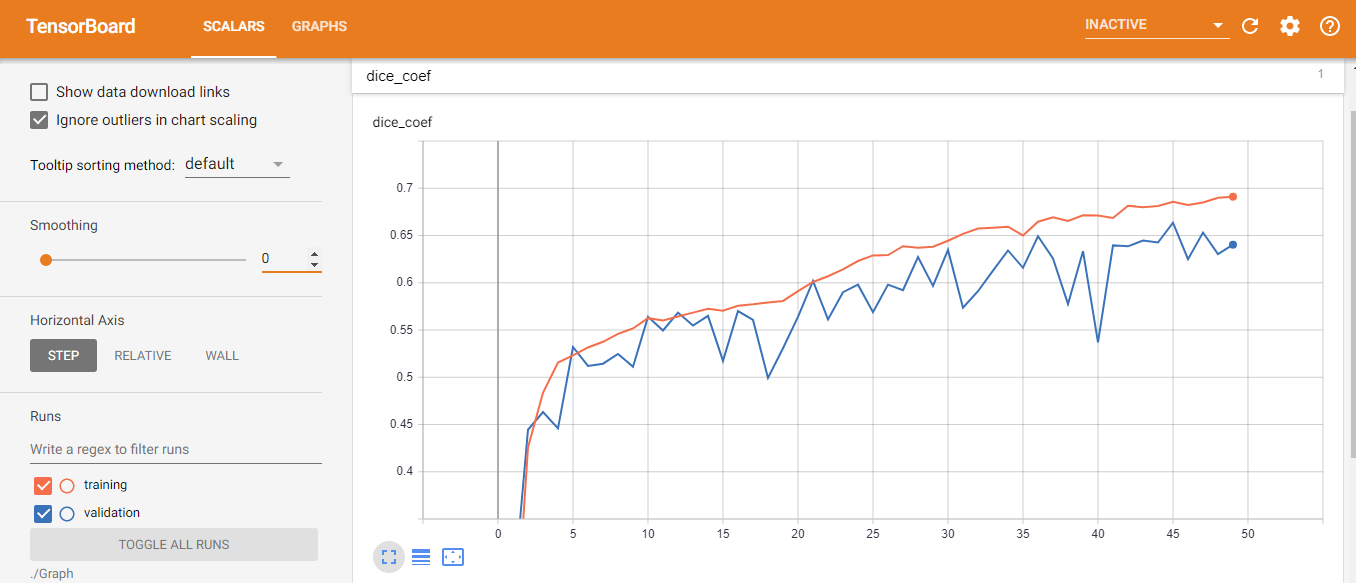

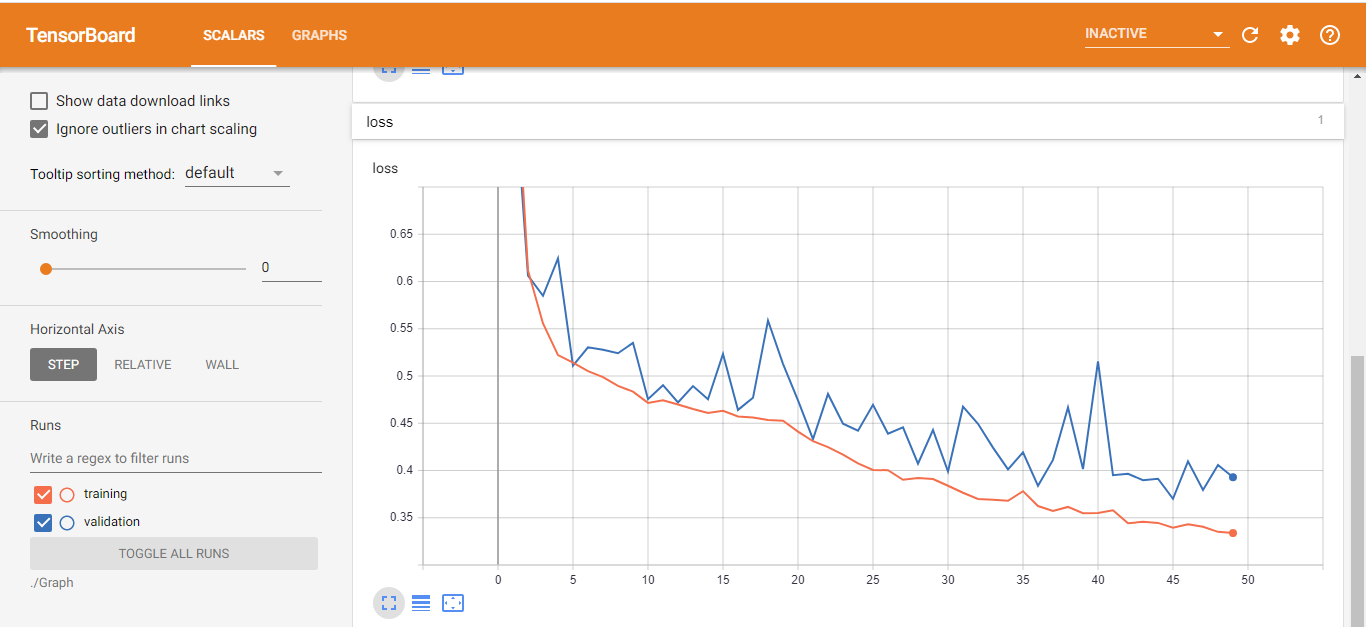

## 5.5. Loading the saved model and testing

In [ ]:
from keras.models import load_model

dependencies = {'bce_dice_loss': bce_dice_loss, 'dice_coef': dice_coef}

filepath= "/content/drive/My Drive/Colab Notebooks/Steel Defect Detection/"
model = load_model(filepath+'model2.h5', custom_objects=dependencies)

In [ ]:
evals= model.evaluate(valid_batches,verbose=1)

58/58 [==============================] - 30s 516ms/step


In [ ]:
print('Validation score:')
print('loss:',evals[0])
print('dice_coeff:',evals[1])

Validation score:
loss: 0.37009855591017626
dice_coeff: 0.6636190219172116


### Utility function to visualize ground truth and predicted mask of an image(train/cv)

In [ ]:
def visualize_prediction(f: str):

    data_path = 'train_images/'
    X = np.empty((1,128,800,3),dtype='uint8')
    img = cv2.imread(data_path + f)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (800,128))
    X[0,] = img
    mask = model.predict(X)

    df1 = data[data.ImageId == f].reset_index()

    if all((df1['Defect_1'].all()=='',df1['Defect_2'].all()=='',df1['Defect_3'].all()=='',df1['Defect_4'].all()=='')):

        fig, (ax1,ax2, ax3) = plt.subplots(nrows = 1,ncols = 3,figsize=(18, 7))
        ax1.imshow(img)
        ax1.set_title(f)

        ax2.imshow(rle2mask(''))
        ax2.set_title('ground truth mask 0')
        
        ax3.imshow(mask[0,:,:,0].round().astype('int'))
        ax3.set_title('predicted mask 0')
        plt.show()
        print('-'*120,'\n')

    else:
        for k in [1,2,3,4]:
            for i in range(len(df1)):
                if df1[f'Defect_{k}'][i] != '':
                    encoded_pix = df1[f'Defect_{k}'][i]

                    fig, (ax1,ax2, ax3) = plt.subplots(nrows = 1,ncols = 3,figsize=(18, 7))
                    ax1.imshow(img)
                    ax1.set_title(f)

                    ax2.imshow(rle2mask(encoded_pix))
                    ax2.set_title('ground truth mask '+str(k))
                    
                    ax3.imshow(mask[0,:,:,k-1].round().astype('int'))
                    ax3.set_title('predicted mask '+str(k))
                    plt.show()
                    print('-'*120,'\n')

In [ ]:
cv_data[cv_data.ImageId=='4d38c353e.jpg']

,ImageId,Defect_1,Defect_2,Defect_3,Defect_4
3800,4d38c353e.jpg,,,62142 9 62382 25 62550 10 62621 42 62788 28 62...,102638 5 102894 9 103150 9 103406 10 103662 10...


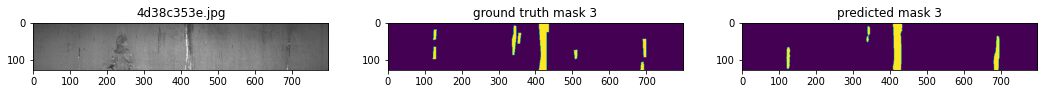

------------------------------------------------------------------------------------------------------------------------ 



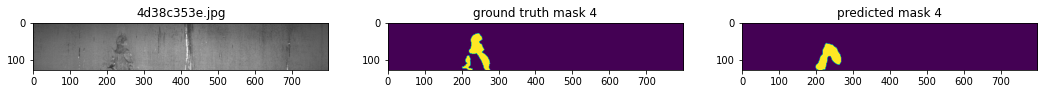

------------------------------------------------------------------------------------------------------------------------ 



In [ ]:
visualize_predictions('4d38c353e.jpg')

## 5.6. Predicting on raw test images

### 5.6.1. Predict on half size images(128x800)

In [ ]:
# Predicting on test data

data_path = 'test_images/'
files = list(os.listdir(data_path))
img_ID= []
classId = []
rle_lst = []
img_classId= []
for f in tqdm(files):
    X = np.empty((1,128,800,3),dtype=np.uint8)
    img = cv2.imread(data_path + f)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (800,128))
    X[0,] = img
    mask = model.predict(X)
    rle_m = np.empty((128,800),dtype=np.uint8)
    for i in range(4):
        rle_m = mask[0,:,:,i].round().astype(int)
        rle = mask2rle(rle_m)
        rle_lst.append(rle)
        img_ID.append(f)
        classId.append(str(i+1))
        img_classId.append(f+'_'+str(i+1))

#### Creating csv file for Kaggle submission

In [ ]:
output = {'ImageId_ClassId':img_classId, 'EncodedPixels' : rle_lst}

filepath= "/content/drive/My Drive/Colab Notebooks/Steel Defect Detection/"
output_df = pd.DataFrame(output)
output_df.to_csv(filepath+'submission_halfsize2.csv', index=False)

### 5.6.2. Predict on full size images(256x1600)

**Modifying the model architecture for new input size 256x1600**

In [ ]:
input_img = Input((256, 1600, 3), name='img')
model1 = get_unet(input_img, n_filters=8, dropout=0.2, batchnorm=True)
model1.compile(optimizer=Adam(), loss=bce_dice_loss, metrics=[dice_coef])
model1.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img (InputLayer)                (None, 256, 1600, 3) 0                                            
__________________________________________________________________________________________________
conv2d_47 (Conv2D)              (None, 256, 1600, 8) 224         img[0][0]                        
__________________________________________________________________________________________________
batch_normalization_37 (BatchNo (None, 256, 1600, 8) 32          conv2d_47[0][0]                  
__________________________________________________________________________________________________
activation_37 (Activation)      (None, 256, 1600, 8) 0           batch_normalization_37[0][0]     
____________________________________________________________________________________________

In [ ]:
model1.set_weights(model.get_weights())

In [ ]:
# Predicting on test data

data_path = 'test_images/'
files = list(os.listdir(data_path))
img_ID= []
classId = []
rle_lst = []
img_classId= []
for f in tqdm(files):
    X = np.empty((1,256,1600,3),dtype=np.uint8)
    img = cv2.imread(data_path + f)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # img = cv2.resize(img, (800,128))
    X[0,] = img
    mask = model1.predict(X)
    rle_m = np.empty((256,1600),dtype=np.uint8)
    for i in range(4):
        rle_m = mask[0,:,:,i].round().astype(int)
        rle = mask2rle(rle_m)
        rle_lst.append(rle)
        img_ID.append(f)
        classId.append(str(i+1))
        img_classId.append(f+'_'+str(i+1))

#### Creating csv file for Kaggle submission

In [ ]:
output = {'ImageId_ClassId':img_classId, 'EncodedPixels' : rle_lst}

filepath= "/content/drive/My Drive/Colab Notebooks/Steel Defect Detection/"
output_df = pd.DataFrame(output)
output_df.to_csv(filepath+'submission_fullsize2.csv', index=False)